<h1/><centre> Weather Analysis between North and South India</centre> </h1>

## Import Dataset

In [2]:
import chart_studio.plotly as py

In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
#print(os.listdir("C:/Users/vsubramanian/Desktop/Python/Python Restart/DataScience/Weather_Project/input"))
# Any results you write to the current directory are saved as output.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load ,Explore , Cleaning Dataset

In [6]:
NI_List_df = pd.read_csv('input/NI_list_v04r00.csv')

C:\Users\vivek\AppData\Local\Temp\ipykernel_13144\2278138323.py:1: DtypeWarning: Columns (161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  NI_List_df = pd.read_csv('input/NI_list_v04r00.csv')


In [7]:
NI_List_df.isnull().sum()

SID                0
SEASON             0
NUMBER             0
BASIN            482
SUBBASIN         449
                ... 
USA_SEARAD_SE      0
USA_SEARAD_SW      0
USA_SEARAD_NW      0
STORM_SPEED        0
STORM_DIR          0
Length: 163, dtype: int64

In [8]:
NI_List_df.drop(['USA_AGENCY', 'USA_ATCF_ID', 'USA_LAT', 'USA_LON', 'USA_RECORD', 'USA_STATUS', 'USA_WIND', 'USA_WIND', 'USA_PRES'
                , 'USA_SSHS', 'USA_R34_NE', 'USA_R34_SE', 'USA_R34_SW','USA_R34_NW','USA_R50_NE', 'USA_R50_SE', 'USA_R50_SW','USA_R50_NW',
                'USA_R64_NE', 'USA_R64_SE', 'USA_R64_SW','USA_R64_NW','USA_POCI','USA_ROCI', 'USA_RMW', 'USA_EYE'],axis=1, inplace=True)

In [9]:
NI_List_df.drop(['TOKYO_LAT', 'TOKYO_LON', 'TOKYO_GRADE', 'TOKYO_WIND', 'TOKYO_PRES', 'TOKYO_R50_DIR', 'TOKYO_R50_LONG', 'TOKYO_R50_SHORT', 'TOKYO_R30_DIR'
                , 'TOKYO_R30_LONG', 'TOKYO_R30_SHORT', 'TOKYO_LAND'],axis=1, inplace=True)

In [10]:
NI_List_df.drop(['CMA_LAT', 'CMA_LON', 'CMA_CAT', 'CMA_WIND', 'CMA_PRES', 'HKO_LAT', 'HKO_LON', 'HKO_CAT', 'HKO_WIND'
                , 'HKO_PRES'],axis=1, inplace=True)

In [11]:
NI_List_df.drop(['NADI_LAT', 'NADI_LON', 'NADI_CAT', 'NADI_WIND', 'NADI_PRES', 'WELLINGTON_LAT', 'WELLINGTON_LON', 'WELLINGTON_WIND',
                 'WELLINGTON_PRES', 'DS824_LAT', 'DS824_LON', 'DS824_STAGE', 'DS824_WIND', 'DS824_PRES', 'TD9636_LAT',
                 'TD9636_LON', 'TD9636_STAGE', 'TD9636_WIND', 'TD9636_PRES', 'TD9635_LAT', 'TD9635_LON', 'TD9635_WIND',
                'TD9635_PRES', 'TD9635_ROCI'],axis=1, inplace=True)

In [12]:
NI_List_df.drop(['NEUMANN_LAT', 'NEUMANN_LON', 'NEUMANN_CLASS', 'NEUMANN_WIND', 'NEUMANN_PRES', 'MLC_LAT', 'MLC_LON', 'MLC_CLASS',
                 'MLC_WIND', 'MLC_PRES', 'USA_GUST', 'USA_SEAHGT', 'USA_SEARAD_NE', 'USA_SEARAD_SE', 'USA_SEARAD_SW',
                 'USA_SEARAD_NW'],axis=1, inplace=True)

In [13]:
NI_List_df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_POCI,BOM_EYE,BOM_POS_METHOD,BOM_PRES_METHOD,BOM_GUST,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,STORM_SPEED,STORM_DIR
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,,,,,,,,,9,266
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,,,,,,,,,9,267
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,...,,,,,,,,,9,268


In [14]:
NI_List_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60658 entries, 0 to 60657
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SID               60658 non-null  object 
 1   SEASON            60658 non-null  int64  
 2   NUMBER            60658 non-null  int64  
 3   BASIN             60176 non-null  object 
 4   SUBBASIN          60209 non-null  object 
 5   NAME              60658 non-null  object 
 6   ISO_TIME          60658 non-null  object 
 7   NATURE            60658 non-null  object 
 8   LAT               60658 non-null  float64
 9   LON               60658 non-null  float64
 10  WMO_WIND          60658 non-null  object 
 11  WMO_PRES          60658 non-null  object 
 12  WMO_AGENCY        60658 non-null  object 
 13  TRACK_TYPE        60658 non-null  object 
 14  DIST2LAND         60658 non-null  int64  
 15  LANDFALL          60658 non-null  object 
 16  IFLAG             60658 non-null  object

In [15]:
NI_List_df.describe()

,SEASON,NUMBER,LAT,LON,DIST2LAND
count,60658.000000,60658.000000,60658.000000,60658.000000,60658.000000
mean,1951.178509,59.249695,17.611600,82.958176,219.061657
std,40.212859,33.213802,6.190622,17.997414,271.343864
min,1842.000000,1.000000,0.700000,-87.717400,0.000000
25%,1921.000000,32.000000,13.000000,77.833975,0.000000
50%,1954.000000,53.000000,18.227050,84.667050,114.000000
75%,1983.000000,87.000000,21.903075,88.600000,364.000000
max,2023.000000,160.000000,83.007500,163.700000,2271.000000


In [16]:
NI_List_df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_POCI,BOM_EYE,BOM_POS_METHOD,BOM_PRES_METHOD,BOM_GUST,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,STORM_SPEED,STORM_DIR
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,,,,,,,,,9,266
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,,,,,,,,,9,267
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,...,,,,,,,,,9,268


# Data Visulization

In [17]:
import seaborn as sns

In [18]:
%matplotlib inline

In [35]:
SEASONS  = [2023,2022, 2021,2020,2019,2018,2017,2015]


print(NI_List_df[NI_List_df.SEASON.isin(SEASONS)])

                 SID  SEASON  NUMBER BASIN SUBBASIN      NAME  \
57485  2015157N13069    2015      31    NI       AS   ASHOBAA   
57486  2015157N13069    2015      31    NI       AS   ASHOBAA   
57487  2015157N13069    2015      31    NI       AS   ASHOBAA   
57488  2015157N13069    2015      31    NI       AS   ASHOBAA   
57489  2015157N13069    2015      31    NI       AS   ASHOBAA   
...              ...     ...     ...   ...      ...       ...   
60653  2023337N12083    2023      84    NI       BB  MICHAUNG   
60654  2023337N12083    2023      84    NI       BB  MICHAUNG   
60655  2023337N12083    2023      84    NI       BB  MICHAUNG   
60656  2023337N12083    2023      84    NI       BB  MICHAUNG   
60657  2023337N12083    2023      84    NI       BB  MICHAUNG   

                  ISO_TIME NATURE      LAT      LON  ... BOM_POCI BOM_EYE  \
57485  2015-06-06 06:00:00     TS  13.1000  68.5000  ...                    
57486  2015-06-06 09:00:00     TS  13.4500  68.5599  ...         

In [30]:
# Apply the default theme
sns.set_palette('dark:#5A9_r')
sns.set_style("whitegrid")

In [36]:
speed_ord = NI_List_df.sort_values(by=['STORM_SPEED'], key=lambda col: col.str.lower())
print(speed_ord)

                 SID  SEASON  NUMBER BASIN SUBBASIN       NAME  \
21743  1935217N21089    1935      41    NI       BB  NOT_NAMED   
23824  1940226N20080    1940      47    NI       BB  NOT_NAMED   
30092  1953235N22088    1953      45    NI       BB  NOT_NAMED   
11145  1907238N21087    1907      43    NI       BB  NOT_NAMED   
22817  1937274N12080    1937      52    NI       BB  NOT_NAMED   
...              ...     ...     ...   ...      ...        ...   
60653  2023337N12083    2023      84    NI       BB   MICHAUNG   
60654  2023337N12083    2023      84    NI       BB   MICHAUNG   
60655  2023337N12083    2023      84    NI       BB   MICHAUNG   
60656  2023337N12083    2023      84    NI       BB   MICHAUNG   
60657  2023337N12083    2023      84    NI       BB   MICHAUNG   

                  ISO_TIME NATURE      LAT      LON  ... BOM_POCI BOM_EYE  \
21743  1935-08-05 03:00:00     NR  21.4000  89.4000  ...                    
23824  1940-08-13 03:00:00     NR  20.1000  80.1000  

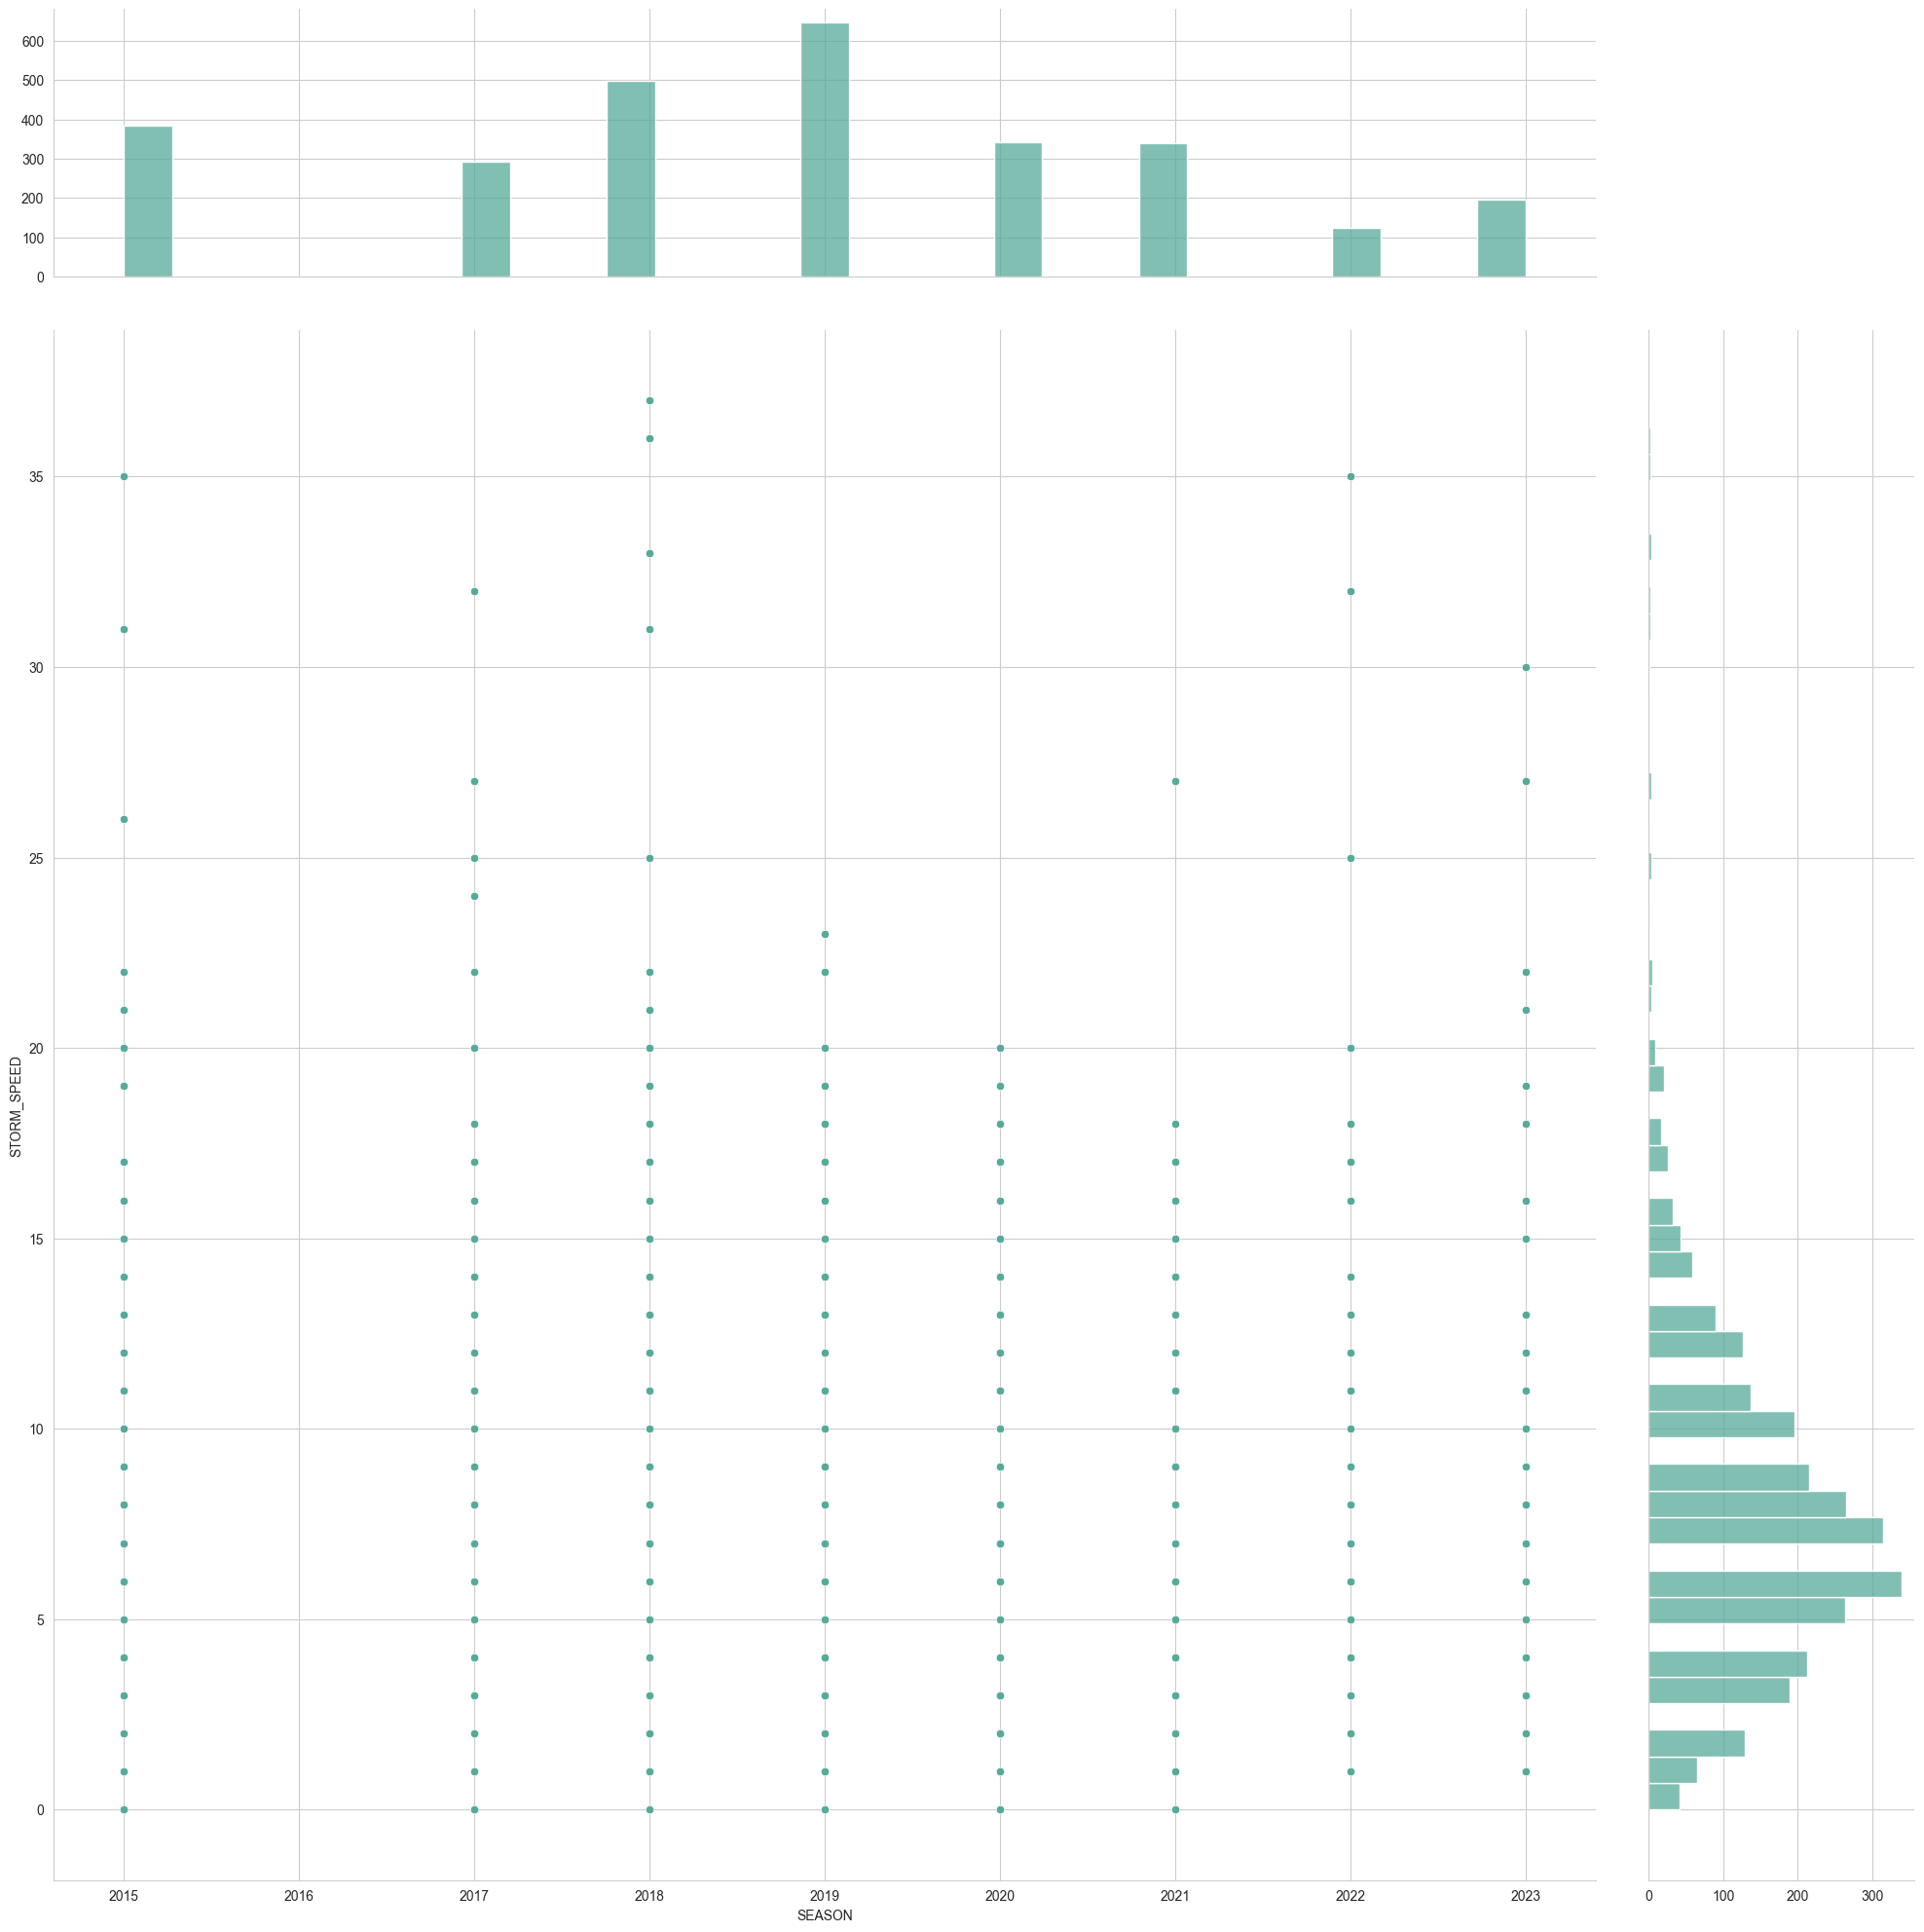

In [37]:
SEA_DIFF  = [2023, 2015]

sns.jointplot(x='SEASON', y='STORM_SPEED',data=speed_ord[speed_ord.SEASON.isin(SEASONS)], height=20, ratio=5, marginal_ticks=True)

<Axes: xlabel='STORM_SPEED', ylabel='NAME'>

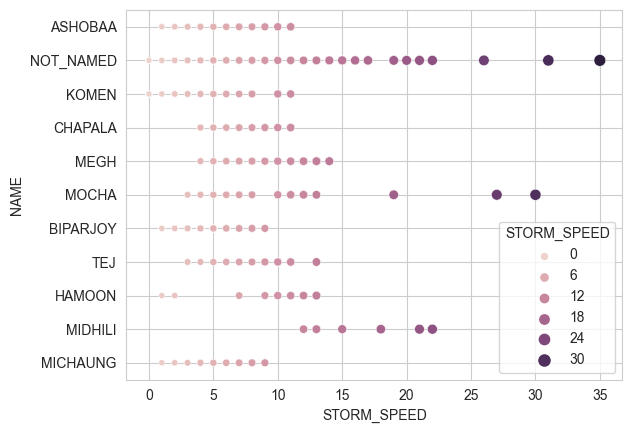

In [38]:
sns.scatterplot(x='STORM_SPEED',y='NAME', hue = 'STORM_SPEED', data=speed_ord[speed_ord.SEASON.isin(SEA_DIFF)], size='STORM_SPEED')

<Axes: xlabel='SEASON', ylabel='Density'>

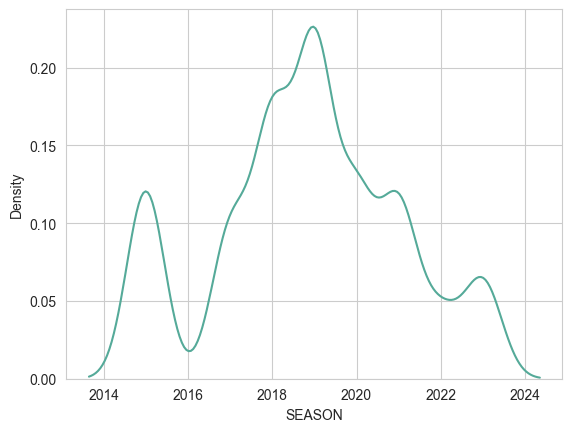

In [34]:
sns.kdeplot(data=speed_ord[speed_ord.SEASON.isin(SEASONS)], x='SEASON')

c:\Users\vivek\anaconda3\envs\DataScience\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



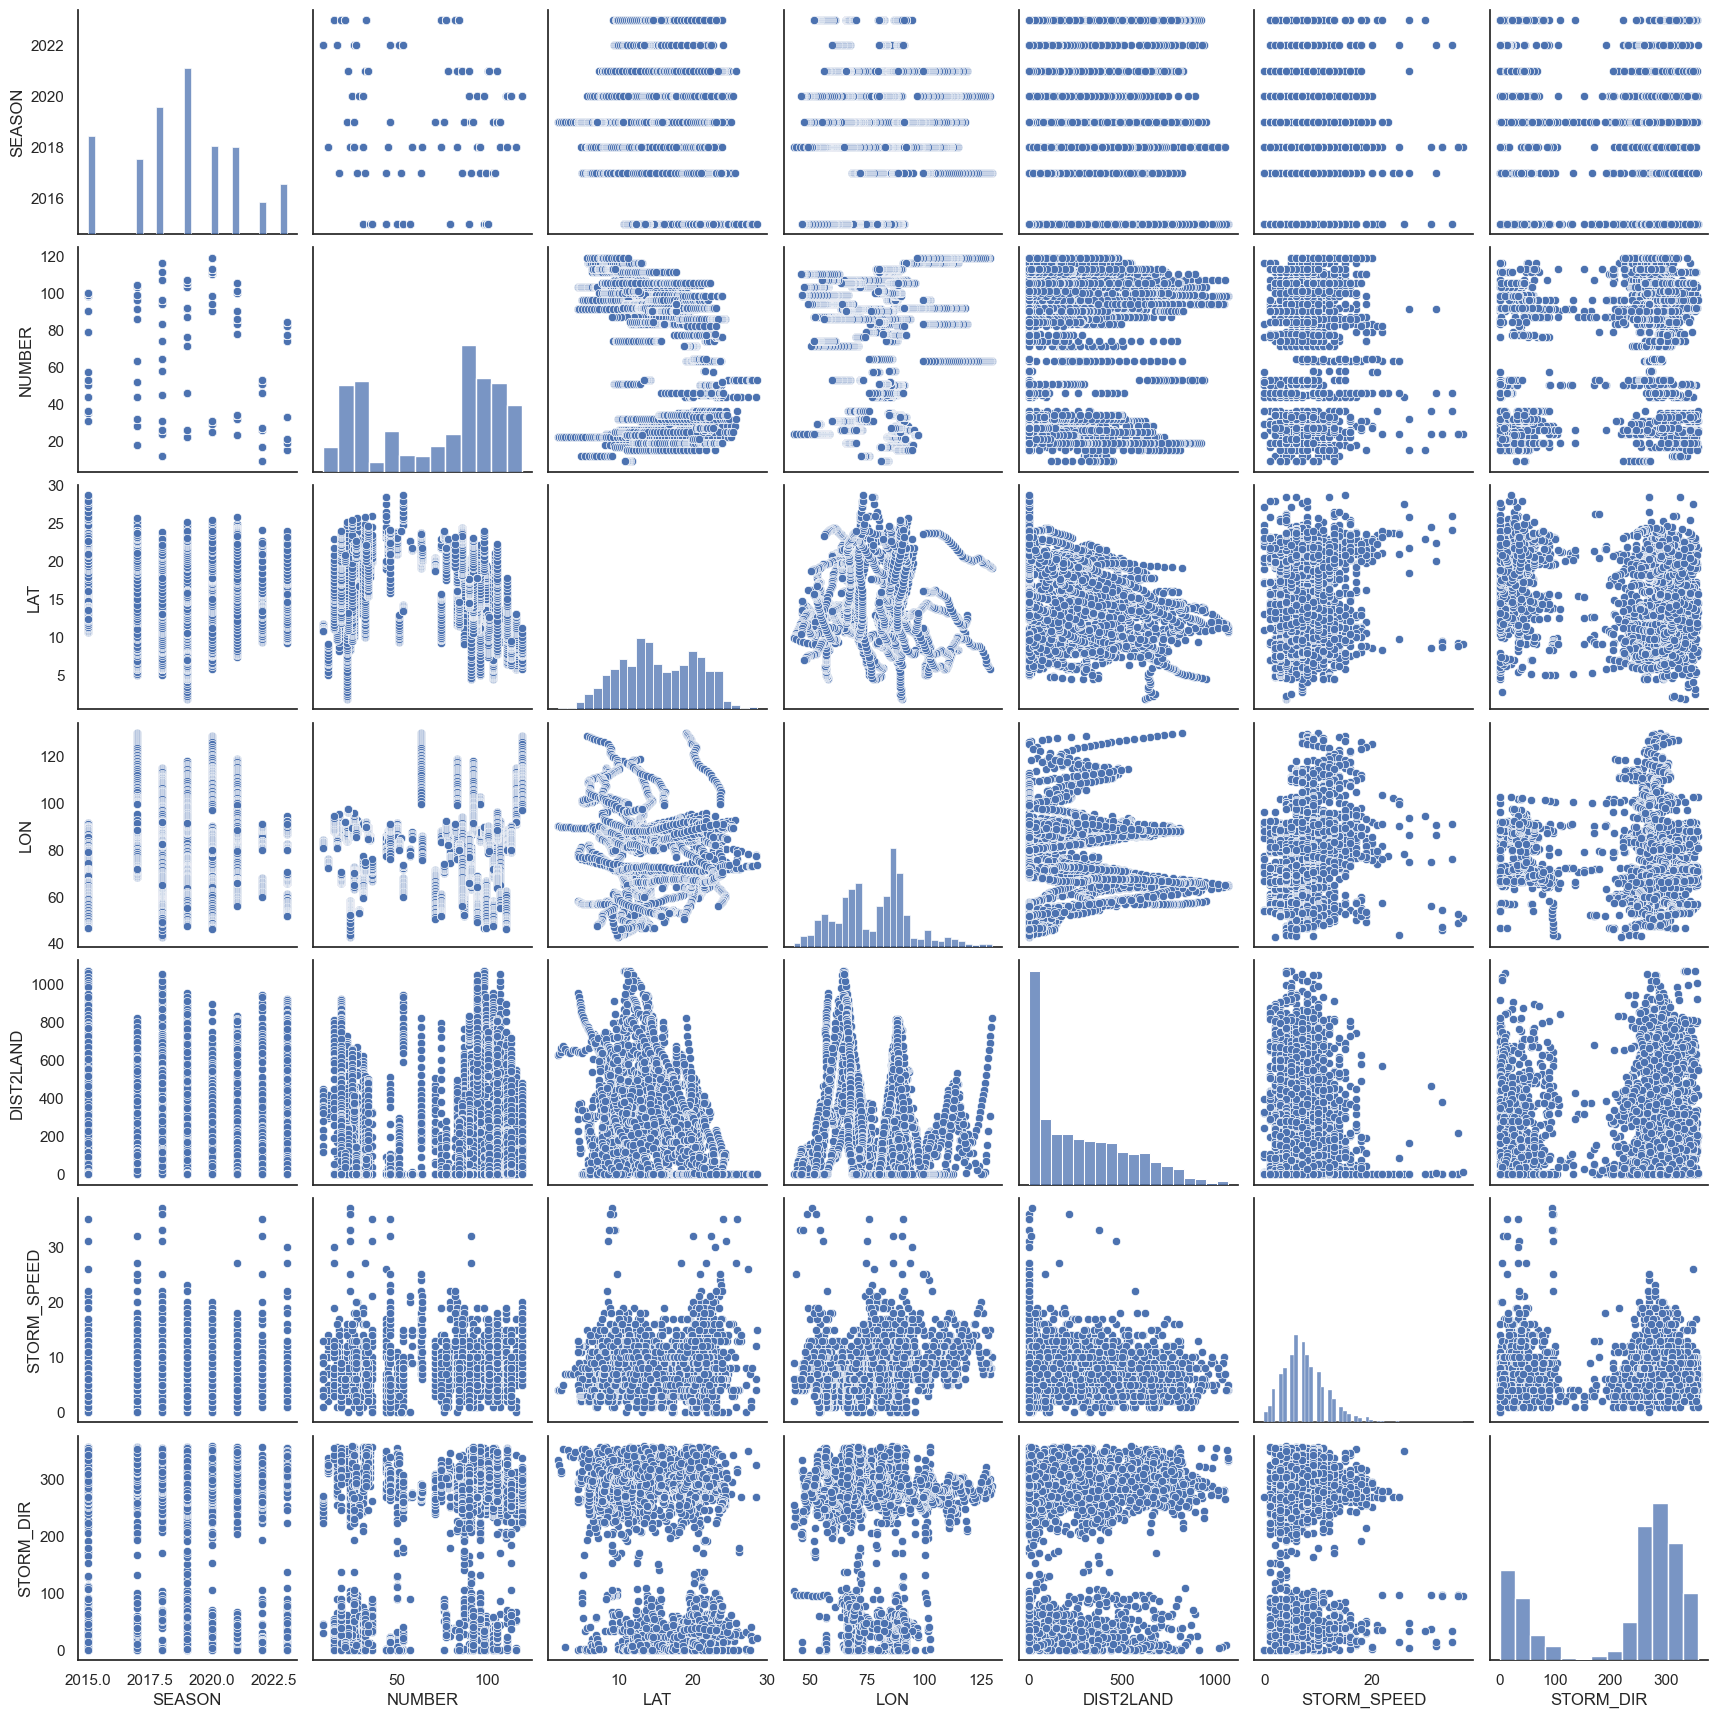

In [62]:

sns.pairplot(data = speed_ord[speed_ord.SEASON.isin(SEASONS)])

# Import Long and Lat in MAP

In [40]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

C:\Users\vivek\AppData\Local\Temp\ipykernel_13144\3793553140.py:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<Axes: >

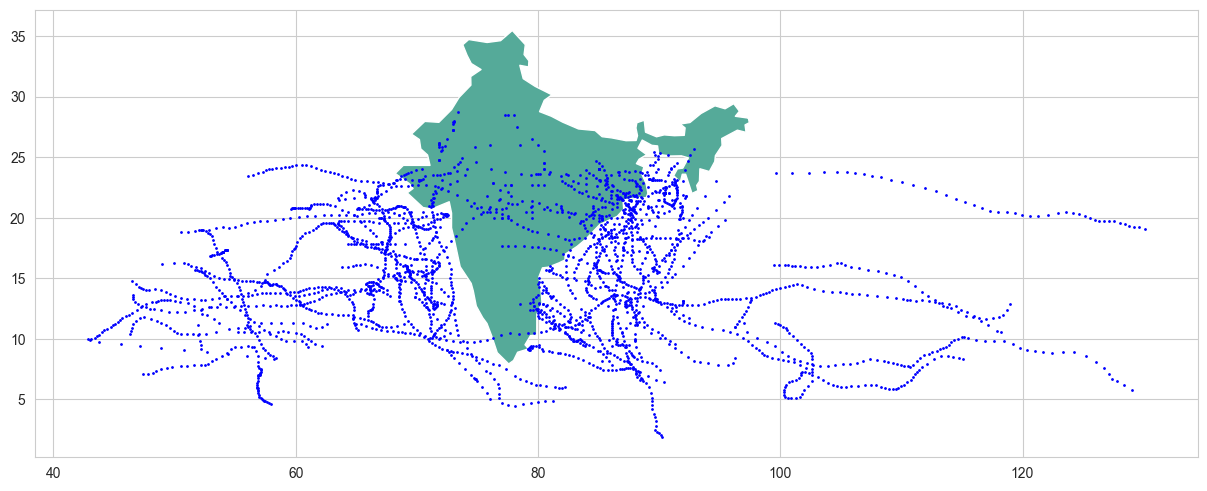

In [41]:
Sea_fall = speed_ord[speed_ord.SEASON.isin(SEASONS)]

Geo = [Point(xy) for xy in zip(Sea_fall['LON'], Sea_fall['LAT'])]
gdf = GeoDataFrame(Sea_fall, geometry = Geo)

#this is simple map that goes with geopandas

india = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india = india[india.name=='India']
gdf.plot(ax=india.plot(figsize=(15,15)), marker='o', color='blue', markersize=1)

In [42]:
import plotly.express as px

fig = px.scatter_geo(Sea_fall, lat='LAT', lon='LON', hover_name='DIST2LAND',opacity = 1, size_max = 10  , projection = 'mercator', scope = 'asia' )
fig.update_layout(title='Weather Forcast, 2015-2023', title_x=1)
fig.show()

In [63]:
import plotly.graph_objects as go

In [70]:
LAND_F = Sea_fall[['DIST2LAND','LANDFALL','STORM_SPEED','NAME']]

fig = go.Figure()

for x in range(40):
    fig.add_trace(go.Scatter(
        x=[LAND_F.iloc[x,:]['DIST2LAND'], LAND_F.iloc[x,:]['DIST2LAND']],
        y=[LAND_F.iloc[x,:]['STORM_SPEED'],LAND_F.iloc[x,:]['NAME']],
        mode="markers+lines+text",
        text = [LAND_F.iloc[x,:]['NAME']],
        textposition="bottom center"
    ))

    fig.update_layout(  
        showlegend=False,
    )
fig.show()